In [148]:
import numpy as np
import random
from matplotlib import pyplot as plt

In [149]:
# Inicializar los vectores
W1 = np.zeros((3, 1)) # vector de pesos de la neurona 1: W1,1; W1,2; b1
W2 = np.zeros((3, 1)) # vector de pesos de la neurona 2: W2,1; W2,2; b2
W3 = np.zeros((3, 1)) # vector de pesos de la neurona 3: W3,1; W3,2; b3

random.seed(42)  # Establecer la semilla a un número específico

# Llenar los vectores con valores aleatorios entre 0 y 1
for i in range(3):
    W1[i] = random.uniform(0, 1)
    W2[i] = random.uniform(0, 1)
    W3[i] = random.uniform(0, 1)

W1 = W1.T
W2 = W2.T
W3 = W3.T

W1.shape

(1, 3)

In [150]:
# Dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

In [151]:
def sigmoid(x):
        g_x = 1 / (1 + np.exp(-x))
        return g_x

In [152]:
error = [0.0,0.0,0.0,0.0]
Grad_W1 = [0.0,0.0,0.0]
Grad_W2 = [0.0,0.0,0.0]
Grad_W3 = [0.0,0.0,0.0]
lr = 0.1
mse = []

for epoca in range (700):
    i = 0

    for X1, y1 in zip(X, y): 
        Z1 = W1[:,0] * X1[0] + W1[:,1] * X1[1] + W1[:,2]
        Z2 = W2[:,0] * X1[0] + W2[:,1] * X1[1] + W2[:,2]
        A1 = sigmoid(Z1)
        A2 = sigmoid(Z2)
        Z3 = W3[:,0] * A1 + W3[:,1] * A2 + W3[:,2]
        
        prediction = Z3

        # Calculate the error 
        error[i] = float(np.power(y1 - prediction,2))
        i = i + 1

        # Calculate the gradient

        Grad_W1[0] = float(-2 * (y1 - prediction) * W3[:,0] * sigmoid(Z1) * (1-sigmoid(Z1)) * X1[0])
        Grad_W1[1] = float(-2 * (y1 - prediction) * W3[:,0] * sigmoid(Z1) * (1-sigmoid(Z1)) * X1[1])
        Grad_W1[2] = float(-2 * (y1 - prediction) * W3[:,0] * sigmoid(Z1) * (1-sigmoid(Z1)))

        Grad_W2[0] = float(-2 * (y1 - prediction) * W3[:,1] * sigmoid(Z2) * (1-sigmoid(Z2)) * X1[0])
        Grad_W2[1] = float(-2 * (y1 - prediction) * W3[:,1] * sigmoid(Z2) * (1-sigmoid(Z2)) * X1[1])
        Grad_W2[2] = float(-2 * (y1 - prediction) * W3[:,1] * sigmoid(Z2) * (1-sigmoid(Z2)))

        Grad_W3[0] = float(-2 * (y1 - prediction) * A1)
        Grad_W3[1] = float(-2 * (y1 - prediction) * A2)
        Grad_W3[2] = float(-2 * (y1 - prediction))

        # Back propagation
        W1 = W1 - (lr * np.array(Grad_W1))
        W2 = W2 - (lr * np.array(Grad_W2))
        W3 = W3 - (lr * np.array(Grad_W3))

    mse.append(sum(error)/4)


In [153]:
print(W1)
print(W2)
print(W3)

[[ 2.2250347  -2.23868916 -1.31561913]]
[[-2.84489058  2.86374475 -2.09347565]]
[[ 2.51276161  2.54514987 -0.80981151]]


In [154]:
# Predicciones
predicciones = []
for X1 in (X): 
    Z1 = W1[:,0] * X1[0] + W1[:,1] * X1[1] + W1[:,2]
    Z2 = W2[:,0] * X1[0] + W2[:,1] * X1[1] + W2[:,2]
    A1 = sigmoid(Z1)
    A2 = sigmoid(Z2)
    Z3 = W3[:,0] * A1 + W3[:,1] * A2 + W3[:,2]
    prediction = Z3

    predicciones.append(float(np.round(Z3, decimals=1)))

print (X)
print (predicciones)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[0.0, 1.0, 1.0, 0.0]


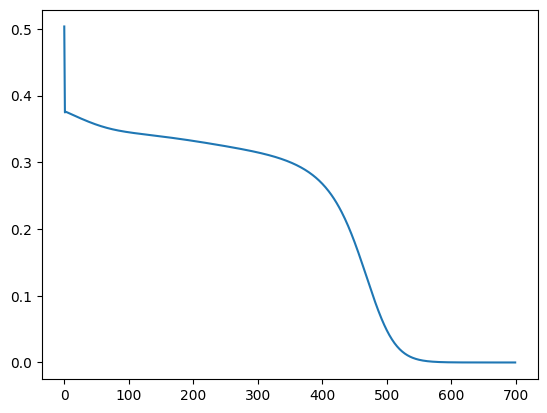

In [155]:
plt.plot(mse)